##                     Project 6- Pharmaceutical Sales prediction across multiple stores

### Objective

##### The objective of the project is to develop a machine learning solution that accurately predicts pharmaceutical sales across multiple stores of Rossmann Pharmaceuticals. The prediction should cover a period of six weeks ahead of time, incorporating various factors such as promotions, competition, school and state holidays, seasonality, and locality. The end product should provide reliable forecasts to assist the finance team in making informed decisions regarding resource allocation, inventory management, and strategic planning.

### Business Need

##### Rossmann Pharmaceuticals requires accurate sales forecasting to optimize its operations and maximize profitability. Currently, individual store managers rely on subjective methods for sales prediction, which may lead to inefficiencies and missed opportunities. By implementing a data-driven approach, the company aims to improve the accuracy of sales forecasts, enabling better resource allocation, inventory planning, and promotional strategies. Additionally, the centralized prediction system will provide a standardized method for forecasting across all stores, ensuring consistency and alignment with company objectives. Ultimately, the project addresses the business need for enhanced decision-making capabilities and improved operational efficiency within Rossmann Pharmaceuticals

### Libraries Used

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Data

Importing Store data

In [6]:
pharma_store=pd.read_csv("store.csv")

Importing Test Data

In [7]:
pharma_test=pd.read_csv("test.csv")

Importing Train Data

In [8]:
pharma_train=pd.read_csv("train.csv")

C:\Users\pooji\AppData\Local\Temp\ipykernel_28800\1355783094.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  pharma_train=pd.read_csv("train.csv")


##### Since getting Dtype error in the Promo Column, we have modified the code

In [22]:
pharma_train = pd.read_csv("train.csv", dtype={"Promo": "int64"}, low_memory=False)

In [23]:
pharma_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [24]:
pharma_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [25]:
pharma_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


### Pharma_Store data analysis

### Information about pharma_store data frame

In [30]:
pharma_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Finding the Unique values in the columns

In [36]:
pharma_store['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [37]:
pharma_store['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [38]:
pharma_store['CompetitionDistance'].unique()

array([1.270e+03, 5.700e+02, 1.413e+04, 6.200e+02, 2.991e+04, 3.100e+02,
       2.400e+04, 7.520e+03, 2.030e+03, 3.160e+03, 9.600e+02, 1.070e+03,
       1.300e+03, 4.110e+03, 3.270e+03, 5.000e+01, 1.384e+04, 3.240e+03,
       2.340e+03, 5.500e+02, 1.040e+03, 4.060e+03, 4.590e+03, 4.300e+02,
       2.300e+03, 6.000e+01, 1.200e+03, 2.170e+03, 4.000e+01, 9.800e+03,
       2.910e+03, 1.320e+03, 2.240e+03, 7.660e+03, 5.400e+02, 4.230e+03,
       1.090e+03, 2.600e+02, 1.800e+02, 1.180e+03, 2.900e+02, 4.880e+03,
       9.710e+03, 2.700e+02, 1.060e+03, 1.801e+04, 6.260e+03, 1.057e+04,
       4.500e+02, 3.036e+04, 7.170e+03, 7.200e+02, 6.620e+03, 4.200e+02,
       7.340e+03, 2.840e+03, 5.540e+03, 3.500e+02, 2.050e+03, 3.700e+03,
       2.256e+04, 4.100e+02, 2.500e+02, 1.130e+03, 4.840e+03, 1.750e+04,
       2.200e+03, 1.650e+03, 3.300e+02, 2.244e+04, 1.996e+04, 3.510e+03,
       3.320e+03, 7.910e+03, 2.370e+03, 2.239e+04, 2.710e+03, 1.181e+04,
       1.870e+03, 4.800e+02, 5.600e+02, 1.069e+04, 

In [40]:
pharma_store['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [41]:
pharma_store['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [42]:
pharma_store['Promo2SinceWeek'].unique()

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [43]:
pharma_store['Promo2SinceYear'].unique()

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [44]:
pharma_store['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

### Finding the null values in pharma_store dataframe

In [31]:
pharma_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

#### Filling Missing Values

In [52]:
pharma_store['CompetitionDistance'].fillna(pharma_store['CompetitionDistance'].median())
pharma_store['CompetitionOpenSinceMonth'].fillna(value=0, inplace=True)
pharma_store['CompetitionOpenSinceYear'].fillna(value=0, inplace=True)
pharma_store['Promo2SinceWeek'].fillna(value=0, inplace=True)
pharma_store['Promo2SinceYear'].fillna(value=0, inplace=True)
pharma_store['PromoInterval'].fillna('Not Available', inplace=True)


* In the Column 'CompetitionDistance' - fills missing values with Median value
* In the Column 'CompetitionOpenSinceMonth' - fills missing values with '0'
* In the Column 'CompetitionOpenSinceYear' - fills missing values with '0'
* In the Column 'Promo2SinceWeek' - fills missing values with '0'
* In the Column 'Promo2SinceYear' - fills missing values with '0'
* In the Column 'PromoInterval' - fills missing values with 'Not Available'

* Overall handling the missing values replacing them with a meaningfull values


### Pharma_Test Data Analysis 

In [54]:
pharma_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [56]:
pharma_test['Id'].unique()

array([    1,     2,     3, ..., 41086, 41087, 41088], dtype=int64)

In [57]:
pharma_test['DayOfWeek'].unique()

array([4, 3, 2, 1, 7, 6, 5], dtype=int64)

In [58]:
pharma_test['Date'].unique()

array(['2015-09-17', '2015-09-16', '2015-09-15', '2015-09-14',
       '2015-09-13', '2015-09-12', '2015-09-11', '2015-09-10',
       '2015-09-09', '2015-09-08', '2015-09-07', '2015-09-06',
       '2015-09-05', '2015-09-04', '2015-09-03', '2015-09-02',
       '2015-09-01', '2015-08-31', '2015-08-30', '2015-08-29',
       '2015-08-28', '2015-08-27', '2015-08-26', '2015-08-25',
       '2015-08-24', '2015-08-23', '2015-08-22', '2015-08-21',
       '2015-08-20', '2015-08-19', '2015-08-18', '2015-08-17',
       '2015-08-16', '2015-08-15', '2015-08-14', '2015-08-13',
       '2015-08-12', '2015-08-11', '2015-08-10', '2015-08-09',
       '2015-08-08', '2015-08-07', '2015-08-06', '2015-08-05',
       '2015-08-04', '2015-08-03', '2015-08-02', '2015-08-01'],
      dtype=object)

In [59]:
pharma_test['Open'].unique()

array([ 1., nan,  0.])

In [61]:
pharma_test['StateHoliday'].unique()

array(['0', 'a'], dtype=object)

In [62]:
pharma_test['SchoolHoliday'].unique()

array([0, 1], dtype=int64)

#### Data column in Object, Converting into Datatime 

In [64]:
pharma_test['Date']=pd.to_datetime(pharma_test['Date'])

In [68]:
pharma_test['Date'].unique

<bound method Series.unique of 0       2015-09-17
1       2015-09-17
2       2015-09-17
3       2015-09-17
4       2015-09-17
           ...    
41083   2015-08-01
41084   2015-08-01
41085   2015-08-01
41086   2015-08-01
41087   2015-08-01
Name: Date, Length: 41088, dtype: datetime64[ns]>

#### Replacing 'a' with '1' (0 considered has No holiday where as 1 Considered Public Holiday)

In [77]:
pharma_test['StateHoliday']=pharma_test['StateHoliday'].replace({'a':1,'0':0})

In [78]:
pharma_test['StateHoliday'].unique()

array([0, 1], dtype=int64)

In [79]:
pharma_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  int64         
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 2.5 MB


### Finding Missing Values in pharma_test Dataset

In [81]:
pharma_test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

#### Fill missing values in the 'Open' column using forward fill

In [88]:
pharma_test['Open'].fillna(method='ffill', inplace=True)

In [89]:
pharma_test.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### Pharma_Train Data Analysis

In [90]:
pharma_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Unique value in Date- Since it is showing Dtype-Object

In [91]:
pharma_train['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

#### Convering the Object to Datetime type

In [93]:
pharma_train['Date']=pd.to_datetime(pharma_train['Date'])

#### Replacing Object to Integer (0 considered has No holiday, 1 Considered Public Holiday, 2 Considered Easter holiday, 3 Considered Chirstmas holiday)

In [98]:
pharma_train['StateHoliday']=pharma_train['StateHoliday'].replace({'0':0,'a':1,'b':2,'c':3})

In [99]:
pharma_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  int64         
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 69.8 MB


### Finding the Missing values in phama_train dataset

In [103]:
pharma_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

##### There is no null values in pharma_train dataset

In [105]:
pharma_store.corr().round(2)

C:\Users\pooji\AppData\Local\Temp\ipykernel_28800\399274074.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pharma_store.corr().round(2)


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.00,-0.03,-0.03,-0.01,0.01,0.01,0.01
CompetitionDistance,-0.03,1.00,-0.03,-0.00,-0.15,-0.13,-0.15
CompetitionOpenSinceMonth,-0.03,-0.03,1.00,0.79,-0.08,-0.11,-0.08
CompetitionOpenSinceYear,-0.01,-0.00,0.79,1.00,-0.10,-0.12,-0.10
Promo2,0.01,-0.15,-0.08,-0.10,1.00,0.76,1.00
Promo2SinceWeek,0.01,-0.13,-0.11,-0.12,0.76,1.00,0.76
Promo2SinceYear,0.01,-0.15,-0.08,-0.10,1.00,0.76,1.00


C:\Users\pooji\AppData\Local\Temp\ipykernel_28800\2498616229.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pharma_store.corr())


<Axes: >

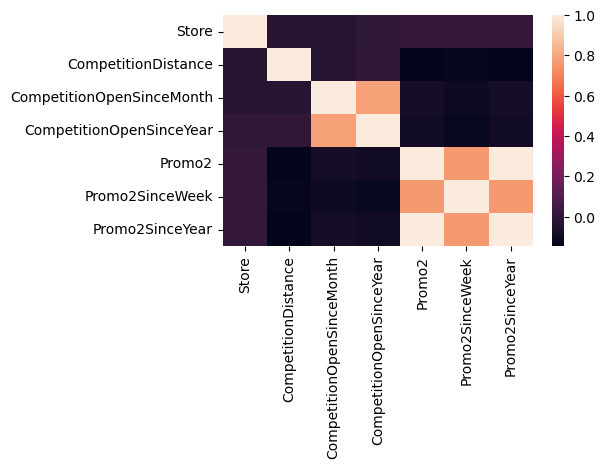

In [111]:
plt.figure(figsize=(5,3))
sns.heatmap(pharma_store.corr())